In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

In [4]:
folder = 'apples'
file = 'url_apples.txt'

In [8]:
folder = 'oranges'
file = 'url_oranges.txt'

In [9]:
path = Path('data/fruit')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
classes = ['apples', 'oranges']

In [11]:
download_images(path/file, dest, max_pics=200)

In [12]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

apples


cannot identify image file '/home/ubuntu/dl/data/fruit/apples/00000002.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/apples/00000020.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/apples/00000028.png'
cannot identify image file '/home/ubuntu/dl/data/fruit/apples/00000097.jpg'
oranges


cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000023.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000151.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000043.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000004.png'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000074.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000110.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000161.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000101.jpeg'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000187.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000124.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000087.jpg'
cannot identify image file '/home/ubuntu/dl/data/fruit/oranges/00000172.jpg'


In [13]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['apples', 'oranges']

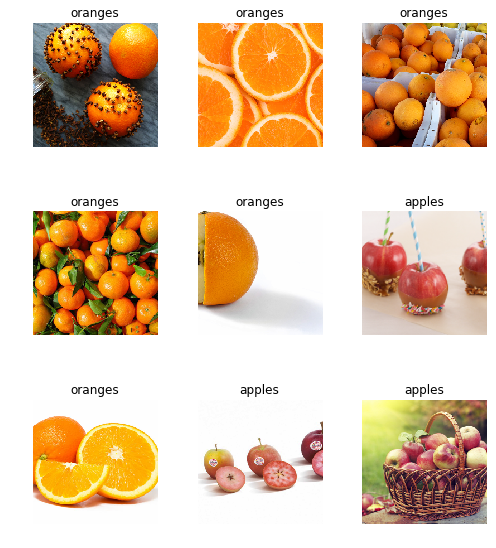

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apples', 'oranges'], 2, 305, 76)

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)